In [1]:
#load data
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_pickle('data.pkl')

In [2]:
df.head()

,label,statement
0,1,building wall usmexico border take literally y...
1,0,wisconsin pace double number layoffs year
2,0,says john mccain done nothing help vets
3,1,suzanne bonamici supports plan cut choice medi...
4,0,asked reporter whether hes center criminal sch...


In [3]:
#find weird data
i=df[df['statement']=='']
print(i)

      label statement
7453      1          
169       1          


In [4]:
#get rid of empty data
df = df.replace('', np.nan)
df = df.dropna()
df

,label,statement
0,1,building wall usmexico border take literally y...
1,0,wisconsin pace double number layoffs year
2,0,says john mccain done nothing help vets
3,1,suzanne bonamici supports plan cut choice medi...
4,0,asked reporter whether hes center criminal sch...
...,...,...
619,1,flake religious tests place senate
620,1,change believe
621,1,deputy director national health statistics off...
622,1,romneys prolife conversion myth reality june 14


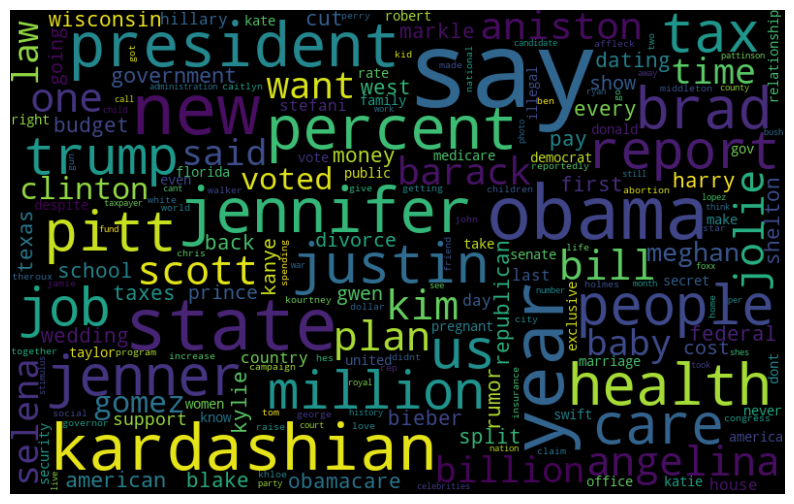

In [5]:
#here it comes some functions for visualizing
#Fakes
from wordcloud import WordCloud
fake_data = df[df["label"] == 0].iloc[:,1]
all_words = ' '.join([text for text in fake_data])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

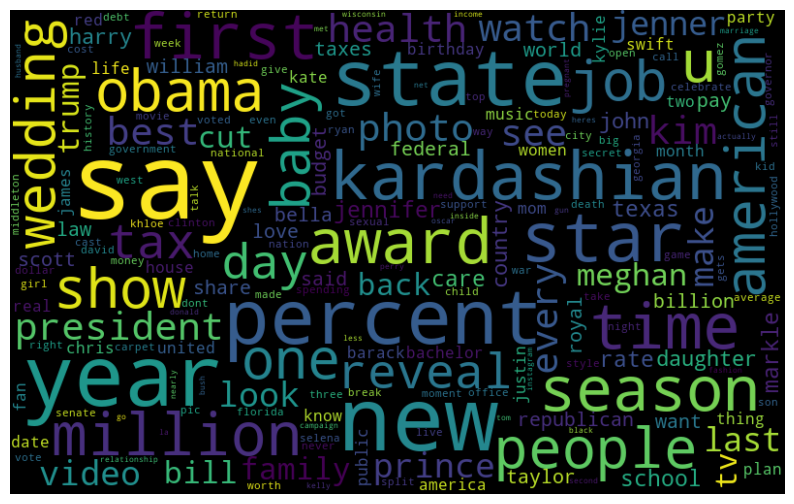

In [6]:
#here it comes some functions for visualizing
#True
fake_data = df[df["label"] == 1].iloc[:,1]
all_words = ' '.join([text for text in fake_data])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
fake_data = df[df["label"] == 1].iloc[:,1]
fake_data.iloc[14587]
#all_words = ' '.join([text for text in fake_data])

'priyanka chopra sings taylor swift tries boston accent beats clown'

In [8]:
fake_data = df[df["label"] == 0].iloc[:,1]
all_words = ' '.join([text for text in fake_data])


In [9]:
#Adapted from sklearn
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
            cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],3)
            print("Normalized confusion matrix")
            plt.title('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        plt.title('Confusion Matrix')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
x = df["statement"].values.astype('U') #https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
y = df["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [12]:
#tf-idf vectorization
tf_idf = TfidfVectorizer()
xv_train = tf_idf.fit_transform(x_train)
xv_test = tf_idf.transform(x_test)

In [13]:
#Model Random Forest
RF=RandomForestClassifier(n_estimators=70, criterion="entropy",max_depth=30, n_jobs=-1)
RF.fit(xv_train, y_train)
#predicted y
y_pred = RF.predict(xv_test)
print(metrics.classification_report(y_test, y_pred, target_names=['Fake', 'True']))
RF.score(xv_test, y_test)

              precision    recall  f1-score   support

        Fake       0.88      0.06      0.11      3486
        True       0.69      1.00      0.81      7310

    accuracy                           0.69     10796
   macro avg       0.78      0.53      0.46     10796
weighted avg       0.75      0.69      0.59     10796



0.693312337902927

Normalized confusion matrix


array([[7282,   28],
       [3283,  203]], dtype=int64)

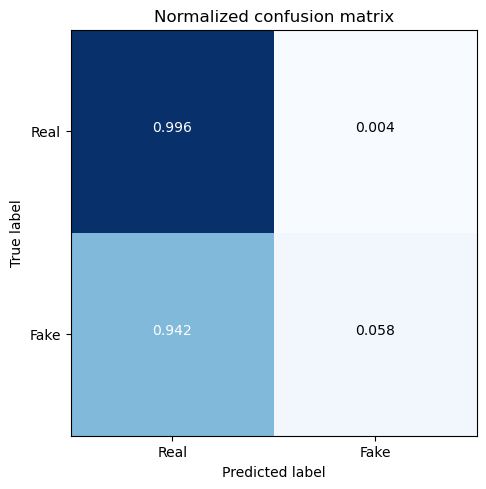

In [14]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])
plot_confusion_matrix(cm, classes=['Real', 'Fake'],normalize=True)
cm

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(xv_train, y_train)
#predicted y
y_pred = GB.predict(xv_test)
print(metrics.classification_report(y_test, y_pred, target_names=['Fake', 'True']))
GB.score(xv_test, y_test)

              precision    recall  f1-score   support

        Fake       0.78      0.15      0.25      3486
        True       0.71      0.98      0.82      7310

    accuracy                           0.71     10796
   macro avg       0.74      0.56      0.54     10796
weighted avg       0.73      0.71      0.64     10796



0.7116524638755094

Normalized confusion matrix


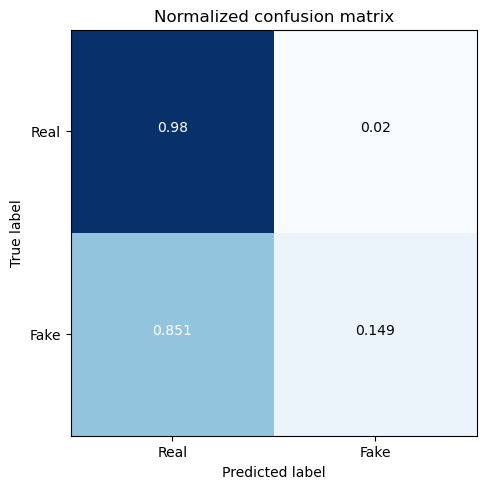

In [16]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])
plot_confusion_matrix(cm, classes=['Real', 'Fake'],normalize=True)

# Optimize Classifier Random Forest

In [23]:
#gridsearch to optimize
from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.model_selection import GridSearchCV
# RF_n=RandomForestClassifier(random_state=42)
# param_grid = { 
#     'n_estimators': [500,800,1000],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [100,150,300],
#     'criterion' :['gini', 'entropy']
# }

In [18]:
#test the gridsearchCV
# Be careful! This take too long to run
# sk_folds = StratifiedKFold(n_splits = 5)
# CV_RF = GridSearchCV(estimator=RF_n, param_grid=param_grid, cv= sk_folds, n_jobs=-1)
# CV_RF.fit(xv_train, y_train)

In [19]:
# CV_RF.best_params_

In [20]:
RF_opt=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 1000, max_depth=300, criterion='entropy',n_jobs=-1)
RF_opt.fit(xv_train, y_train)
#predicted y
y_pred = RF_opt.predict(xv_test)
print(metrics.classification_report(y_test, y_pred, target_names=['Fake', 'True']))
RF_opt.score(xv_test, y_test)

              precision    recall  f1-score   support

        Fake       0.73      0.32      0.45      3486
        True       0.74      0.94      0.83      7310

    accuracy                           0.74     10796
   macro avg       0.74      0.63      0.64     10796
weighted avg       0.74      0.74      0.71     10796



0.7419414597999259

Normalized confusion matrix


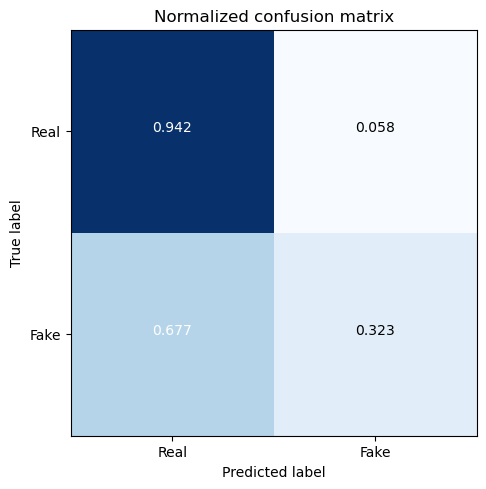

In [21]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])
plot_confusion_matrix(cm, classes=['Real', 'Fake'],normalize=True)

In [24]:
#using stritified K-Fold-->better for unbalanced data?
sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(RF_opt, xv_train, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.74791584 0.74771735 0.75009925 0.73858674 0.74568195]
Average CV Score:  0.7460002255638565
Number of CV Scores used in Average:  5


# Optimize GradientBoostingClassifier

In [25]:
# GradientBoostingClassifier
# parameters = {
#     "learning_rate": [0.01, 0.025, 0.075],
#     "max_depth":[3,5,8],
#     "n_estimators":[100,150,200]
#     }
# #test the gridsearchCV
# sk_folds = StratifiedKFold(n_splits = 5)
# CV_GB = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=parameters, cv= sk_folds, n_jobs=-1)
# CV_GB.fit(xv_train, y_train)

In [26]:
#CV_GB.best_params_

In [27]:
GB_opt=GradientBoostingClassifier(loss= 'log_loss', learning_rate=0.075,
 max_depth= 8,
 n_estimators= 200)
GB_opt.fit(xv_train, y_train)

GradientBoostingClassifier(learning_rate=0.075, max_depth=8, n_estimators=200)

In [28]:
#predicted y
y_pred = GB_opt.predict(xv_test)
print(metrics.classification_report(y_test, y_pred, target_names=['Fake', 'True']))
GB_opt.score(xv_test, y_test)

              precision    recall  f1-score   support

        Fake       0.72      0.28      0.40      3486
        True       0.73      0.95      0.83      7310

    accuracy                           0.73     10796
   macro avg       0.72      0.61      0.61     10796
weighted avg       0.73      0.73      0.69     10796



0.7308262319377548

Normalized confusion matrix


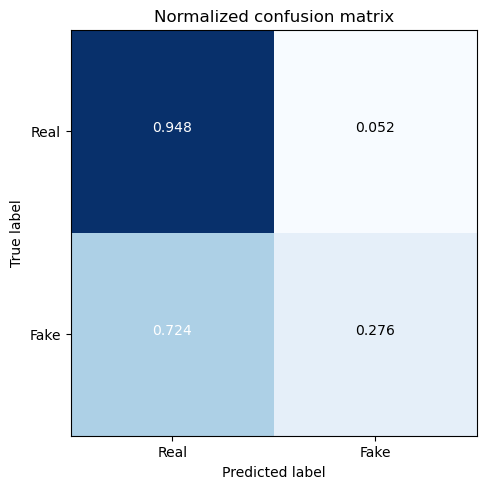

In [29]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])
plot_confusion_matrix(cm, classes=['Real', 'Fake'],normalize=True)